# Bipolar disorder and response to lithium: blood

Dataset Files: 
* gds5393.csv 
* meta-gds5393.csv

**Introdução**

O transtorno bipolar é uma condição mental caracterizada por episódios de humor altamente variáveis, com períodos de euforia ou mania (conhecidos como episódios maníacos) alternando com períodos de profunda depressão (conhecidos como episódios depressivos). O tratamento para o transtorno bipolar geralmente inclui terapia e medicação.

Um dos medicamentos mais comuns utilizados para tratar o transtorno bipolar é o lítio. O lítio é um mineral que atua como estabilizador de humor e é eficaz na prevenção de episódios maníacos e depressivos em pessoas com transtorno bipolar. Ele funciona ajudando a equilibrar os níveis de determinados químicos no cérebro chamados neurotransmissores, que são responsáveis por transmitir informações entre as células cerebrais.


**Sobre o conjunto de dados**

O [conjunto de dados](https://www.ncbi.nlm.nih.gov/sites/GDSbrowser?acc=GDS5393) contém 120 amostras e é referente à análise de sangue periférico de pacientes com transtorno bipolar antes e 1 mês após o tratamento com lítio. A resposta dos pacientes ao lítio foi avaliada após 6 meses. Os resultados identificam uma assinatura de expressão gênica para a resposta ao tratamento com lítio em pacientes com transtorno bipolar.

Pela análise da [documentação](https://www.ncbi.nlm.nih.gov/geo/tools/profileGraph.cgi?ID=GDS5393) do conjunto de dados verificamos o metadados contém as seguintes colunas:
* **sample**: (GSM1105…) - Identificador da amostra. Referente a 120 amostras da colheita de sangue.
* **agent**: (control ou lithium) - Indica se a amostra é de um indivíduo de controlo ou se foi submetido ao tratamento com lítio.
* **other**: (responder ou non-responder) - Identifica se a amostra é de um indivíduo que respondeu ou não ao tratamento.
* **time**: (baseline ou 1 month) - Indica o momento em que a amostra foi colhida.
* **individual**: Identificador único do indivíduo, que pode ser OPT_(N) para indivíduos de control e Li+OPT_(N) para indivíduos que receberam lítio. 
                  Cada indivíduo um tem duas amostras referentes ao momento da recolha (baseline e 1 month).
* **description**: Descrição adicional sobre cada amostra.

### 1. Carregamento e analise dos dados e metadados do dataset

In [2]:
# Importar bibliotecas necessárias para o processamento
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

# Ler dados usando a lib pandas
data = pd.read_csv("gds5393.csv", sep=',', index_col = 0)
meta = pd.read_csv("meta-gds5393.csv", sep=',', index_col = 0)

**1.1 Descrição e caraterização dos dados do dataset**

In [3]:
# Dimensão dos dados
data.values.shape

(48107, 120)

Os dados são compostos por 48107 linhas e 120 colunas.

In [4]:
# análise dos dados
data.describe()

,GSM1105438,GSM1105486,GSM1105487,GSM1105490,GSM1105491,GSM1105495,GSM1105498,GSM1105499,GSM1105506,GSM1105442,...,GSM1105454,GSM1105468,GSM1105481,GSM1105504,GSM1105517,GSM1105525,GSM1105552,GSM1105452,GSM1105453,GSM1105456
count,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,...,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000
mean,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,...,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577
std,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,...,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915
min,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,...,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480
25%,6.815735,6.815730,6.815735,6.815735,6.815735,6.815735,6.815735,6.815735,6.815730,6.815730,...,6.815735,6.815735,6.815735,6.815735,6.815730,6.815735,6.815735,6.815735,6.815735,6.815735
50%,6.940240,6.940240,6.940240,6.940240,6.940240,6.940230,6.940240,6.940240,6.940240,6.940240,...,6.940240,6.940230,6.940240,6.940240,6.940240,6.940240,6.940240,6.940240,6.940240,6.940240
75%,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,...,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960
max,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,...,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700


Podemos observar que, apesar de termos as 48107, o count apenas tem 47323 o que nos indica que provavelmente temos valores nulos.

In [5]:
# Tipo de dados do conjunto dados
data.dtypes

GSM1105438    float64
GSM1105486    float64
GSM1105487    float64
GSM1105490    float64
GSM1105491    float64
               ...   
GSM1105525    float64
GSM1105552    float64
GSM1105452    float64
GSM1105453    float64
GSM1105456    float64
Length: 120, dtype: object

Os dados correspondem aos diferentes tipos de amostras (GSM1105438...) e são do tipo float64.

In [6]:
# análise dos metadados
meta.describe()

,sample,agent,other,time,individual,description
count,120,120,120,120,120,120
unique,120,2,2,2,60,120
top,GSM1105438,control,non-responder,baseline,OPT_1,Value for GSM1105438: OPT_1-baseline; src: Per...
freq,1,64,94,60,2,1


Pelos metadados podemos observar que:
* "sample": contém 120 amostras distintas.
* "agent": contém dois valores distintos. O valor "control" é o mais comum, com 64 amostras.
* "other": contém dois valores distintos. O valor "non-responder" é o mais comum com 94 amostras, o que indica que a maioria dos pacientes no conjunto de dados não respondeu ao tratamento com lítio.
* "time": contém dois valores distintos. O valor "baseline" é o mais comum, com 60 amostras.
* "individual": contém 60 valores distintos, com frequência 2, indicando que o conjunto de dados inclui 2 amostras para cada um dos 60 pacientes diferentes.
* "description" contém 120 valores distintos, com descrições adicionais sobre cada amostra.

In [7]:
# Dimensão dos metadados
meta.values.shape

(120, 6)

In [8]:
# Tipo de dados dos metadados
meta.dtypes

sample         object
agent          object
other          object
time           object
individual     object
description    object
dtype: object

In [9]:
# ver as primeiras 5 linhas do dataset
data.head(5)

,GSM1105438,GSM1105486,GSM1105487,GSM1105490,GSM1105491,GSM1105495,GSM1105498,GSM1105499,GSM1105506,GSM1105442,...,GSM1105454,GSM1105468,GSM1105481,GSM1105504,GSM1105517,GSM1105525,GSM1105552,GSM1105452,GSM1105453,GSM1105456
ILMN_1343048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Podemos ver que temos muitos valores nulos (NaN)

**1.2 Análise e limpeza de dados/metadados com valores nulos**

In [10]:
# verificar a existência de valores nulos nos dados
data.isnull().sum().sum()

94080

In [11]:
# verificar a existência de valores nulos nos dados
meta.isnull().sum().sum()

0

In [12]:
# remover os genes que têm todos os valores como NaN (dados nulos), usando o parâmetro inplace = True para alterar directamente na variável data
data.dropna(inplace = True)

In [13]:
# Ver a nova dimensão dos dados
data.values.shape

(47323, 120)

In [25]:
# fazer a transposta para termos os dados na forma de uma matriz de genes (nas colunas) e amostras (nas linhas)
data = data.transpose()

In [15]:
# Dimensão dos dados
data.values.shape

(120, 47323)

In [16]:
data.head(5)

,ILMN_1343291,ILMN_1343295,ILMN_1651199,ILMN_1651209,ILMN_1651210,ILMN_1651221,ILMN_1651228,ILMN_1651229,ILMN_1651230,ILMN_1651232,...,ILMN_3311145,ILMN_3311150,ILMN_3311155,ILMN_3311160,ILMN_3311165,ILMN_3311170,ILMN_3311175,ILMN_3311180,ILMN_3311185,ILMN_3311190
GSM1105438,14.8983,12.1027,6.90845,6.97636,6.89734,7.01968,11.9813,7.94897,6.88075,7.05958,...,6.89246,6.78430,6.92158,6.92631,7.12904,6.77274,6.85770,7.08213,6.85267,7.81762
GSM1105486,14.7170,12.4403,6.63058,7.16577,6.84158,6.87300,12.9543,7.86514,6.87122,6.87390,...,6.92284,6.82762,7.09969,6.84452,6.92715,6.78293,6.81344,6.85598,6.74649,7.55871
GSM1105487,14.8411,12.4878,6.74203,7.23598,6.83540,7.13678,12.9664,8.50659,6.92326,6.91722,...,6.85514,6.67967,6.91126,6.79946,7.20899,6.73403,6.69688,6.96195,6.82538,7.69129
GSM1105490,14.9191,11.6591,6.84711,7.20855,6.86877,6.87585,13.4400,7.85840,6.79209,6.96697,...,6.86023,6.86298,7.09422,6.83745,7.18966,6.85946,6.69968,6.99962,6.96305,7.32495
GSM1105491,14.7371,11.9833,6.83116,7.17747,6.84190,6.91533,12.9282,7.71051,6.94781,7.10965,...,6.92191,6.79342,6.89431,6.91218,7.23281,6.87367,6.68000,6.88795,6.87131,7.90085


In [17]:
# Calcular as estatísticas e ordenar pelo desvio padrão
data_stats = data.apply(lambda x: [x.min(), x.max(), x.std()]).T

# Adicionar colunas para min, max, e std
data_stats.columns = ['min', 'max', 'std']

# Ordenar pelo desvio padrão
data_stats.sort_values(by='std', ascending=False)

,min,max,std
ILMN_2165753,6.77738,14.44620,2.590349
ILMN_1783142,6.93056,12.83920,2.487481
ILMN_1697499,6.55453,13.11440,2.231319
ILMN_1715169,6.78570,12.61250,2.219528
ILMN_3238417,6.55731,11.07510,1.769046
...,...,...,...
ILMN_1721027,6.56519,6.82548,0.058291
ILMN_2330697,6.56887,6.88156,0.058065
ILMN_1791773,6.59364,6.90225,0.057736
ILMN_1706969,6.55040,6.81494,0.057511


In [18]:
# separação dos dados com a colheita de sangue inicial e 1 mês depois
meta_baseline = meta.query("time == 'baseline'")
data_baseline = data.loc[meta_baseline.index,:]

meta_oneMonth = meta.query("time == '1 month'")
data_oneMonth = data.loc[meta_oneMonth.index,:]

In [19]:
meta_baseline.head()

,sample,agent,other,time,individual,description
GSM1105438,GSM1105438,control,non-responder,baseline,OPT_1,Value for GSM1105438: OPT_1-baseline; src: Per...
GSM1105486,GSM1105486,control,non-responder,baseline,OPT_11,Value for GSM1105486: OPT_11-baseline; src: Pe...
GSM1105487,GSM1105487,control,non-responder,baseline,OPT_12,Value for GSM1105487: OPT_12-baseline; src: Pe...
GSM1105490,GSM1105490,control,non-responder,baseline,OPT_13,Value for GSM1105490: OPT_13-baseline; src: Pe...
GSM1105491,GSM1105491,control,non-responder,baseline,OPT_14,Value for GSM1105491: OPT_14-baseline; src: Pe...


In [20]:
meta_oneMonth.head()

,sample,agent,other,time,individual,description
GSM1105440,GSM1105440,control,non-responder,1 month,OPT_1,Value for GSM1105440: OPT_1-1 month; src: Peri...
GSM1105488,GSM1105488,control,non-responder,1 month,OPT_11,Value for GSM1105488: OPT_11-1 month; src: Per...
GSM1105489,GSM1105489,control,non-responder,1 month,OPT_12,Value for GSM1105489: OPT_12-1 month; src: Per...
GSM1105492,GSM1105492,control,non-responder,1 month,OPT_13,Value for GSM1105492: OPT_13-1 month; src: Per...
GSM1105493,GSM1105493,control,non-responder,1 month,OPT_14,Value for GSM1105493: OPT_14-1 month; src: Per...


**1.3 Exploração gráfica das classe mais relevantes (agent, other e time)**

In [21]:
def print_metadata_size_for_class(classe):
    print("baseline", meta_baseline.groupby(classe).size())
    print("\n1 Month", meta_oneMonth.groupby(classe).size())
    
print_metadata_size_for_class("agent")

baseline agent
control    32
lithium    28
dtype: int64

1 Month agent
control    32
lithium    28
dtype: int64


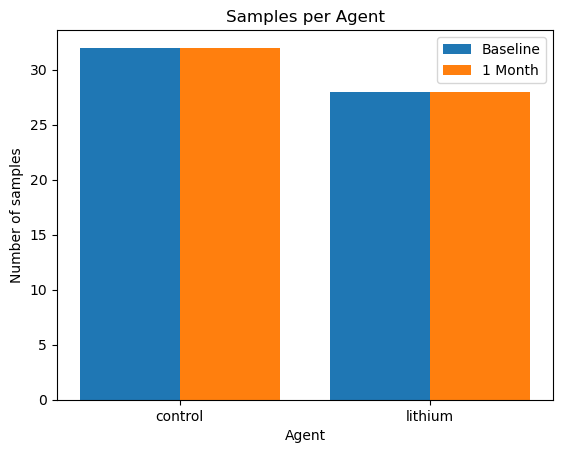

In [22]:
import matplotlib.pyplot as plt

def plot_metadata_for_classe(classe):
    X_axis = np.arange(2)
    X_keys = meta.groupby(classe).groups.keys()
    plt.bar(X_axis - 0.2, meta_baseline.groupby(classe).size(), 0.4, label = 'Baseline')
    plt.bar(X_axis + 0.2, meta_oneMonth.groupby(classe).size(), 0.4, label = '1 Month')


    plt.xticks(X_axis, X_keys)
    plt.xlabel(classe.capitalize())
    plt.ylabel("Number of samples")
    plt.title("Samples per "+ classe.capitalize())
    plt.legend()
    
plot_metadata_for_classe("agent")

baseline other
non-responder    47
responder        13
dtype: int64

1 Month other
non-responder    47
responder        13
dtype: int64


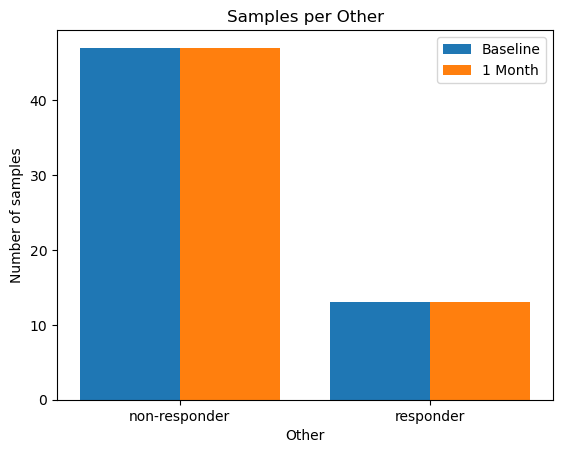

In [23]:
print_metadata_size_for_class("other")
plot_metadata_for_classe("other")

baseline time
baseline    60
dtype: int64

1 Month time
1 month    60
dtype: int64


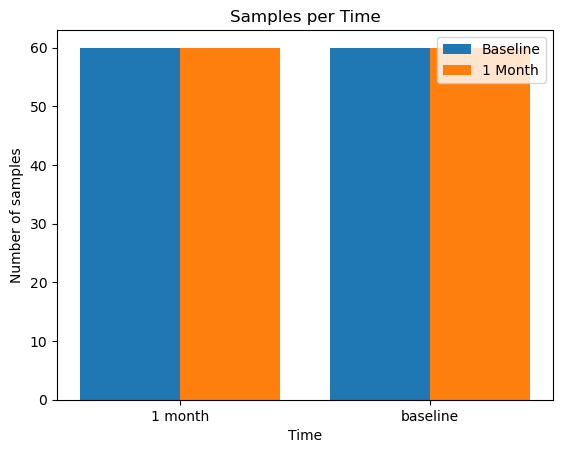

In [24]:
print_metadata_size_for_class("time")
plot_metadata_for_classe("time")